In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Importação dos dados
iris = load_iris()
x = iris.data
y = iris.target

# Transforma o problema em binário: 1 se for Setosa, 0 caso contrário
y_binary = (y == 0).astype(int)

# Préprocessamento
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Separando o dataset de teste e treino
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_binary, test_size=0.3)

# Inicialização do modelo com k=3
model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["Não-Setosa", "Setosa"]))

              precision    recall  f1-score   support

  Não-Setosa       1.00      1.00      1.00        28
      Setosa       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



              precision    recall  f1-score   support

  Não-setosa       0.99      1.00      1.00       100
      Setosa       1.00      0.98      0.99        50

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



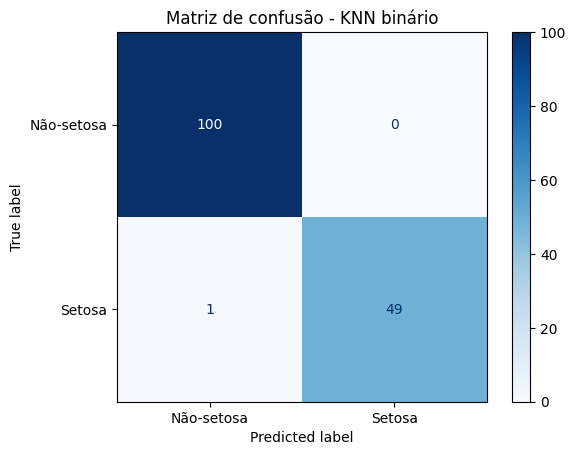

In [3]:
# Importação dos dados
iris = load_iris()
x = iris.data
y = iris.target

# Transforma o problema em binário: 1 se for Setosa, 0 caso contrário
y_binary = (y == 0).astype(int)

# Préprocessamento
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Inicialização do modelo com k=3
model = KNeighborsClassifier(n_neighbors=3)

y_pred = cross_val_predict(model, x_scaled, y_binary, cv=5)

print(classification_report(y_binary, y_pred, target_names=["Não-setosa", "Setosa"]))

cm = confusion_matrix(y_binary, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não-setosa", "Setosa"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusão - KNN binário")
plt.show()